In [1]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import dateutil

In [2]:
%matplotlib inline

In [3]:
Session = sessionmaker()
engine = create_engine('sqlite:///ztis.db')

In [4]:
feeds = pd.read_sql_query('SELECT * FROM ztis', engine)
print("There are %d news in database." % (feeds.shape[0]))
feeds[10:15]

There are 11881 news in database.


,id,source,title,summary,publication_date,author
10,11,BBC\n,UKIP candidate Carl Benjamin in Truro milkshak...,A man was pulled to the ground after attemptin...,"Fri, 10 May 2019 15:03:20 GMT",default
11,12,BBC\n,Labour's Richard Burgon pressed over Zionism r...,The shadow justice secretary denies lying abou...,"Fri, 10 May 2019 08:29:13 GMT",default
12,13,BBC\n,Emergency services radio system '£3.1bn over b...,The Home Office is criticised for failing to d...,"Fri, 10 May 2019 01:34:16 GMT",default
13,14,BBC\n,New post-Brexit immigration plan 'needed for S...,The head of the CBI calls for a lower minimum ...,"Thu, 09 May 2019 23:55:27 GMT",default
14,15,BBC\n,Benefit penalties cut by Amber Rudd for claima...,Claimants who fail to follow rules can now onl...,"Thu, 09 May 2019 16:41:42 GMT",default


In [5]:

feedsDistribution = pd.read_sql_query('SELECT source, COUNT(id) AS news \
FROM ztis \
GROUP BY source \
ORDER BY COUNT(id) DESC', engine)
feedsDistribution

,source,news
0,US News\n,3760
1,CBS News - USA\n,834
2,Japan Times\n,636
3,CNN - Top Stories\n,623
4,ABC News - USA\n,622
5,The Daily Telegraph\n,586
6,New Zealand Herald\n,550
7,Fox News\n,530
8,Reuters\n,522
9,NBC News\n,496


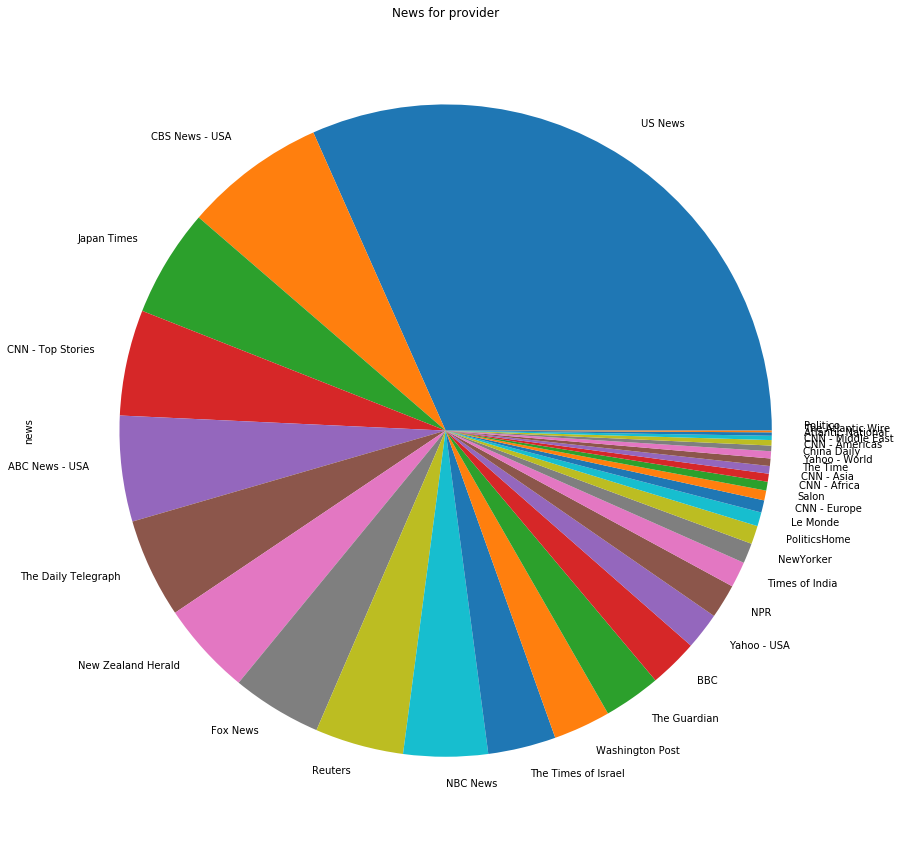

In [6]:
feedPie = feedsDistribution[["source", "news"]].set_index('source')
feedPie.plot.pie('news',figsize=(15, 15), title="News for provider", legend=False)

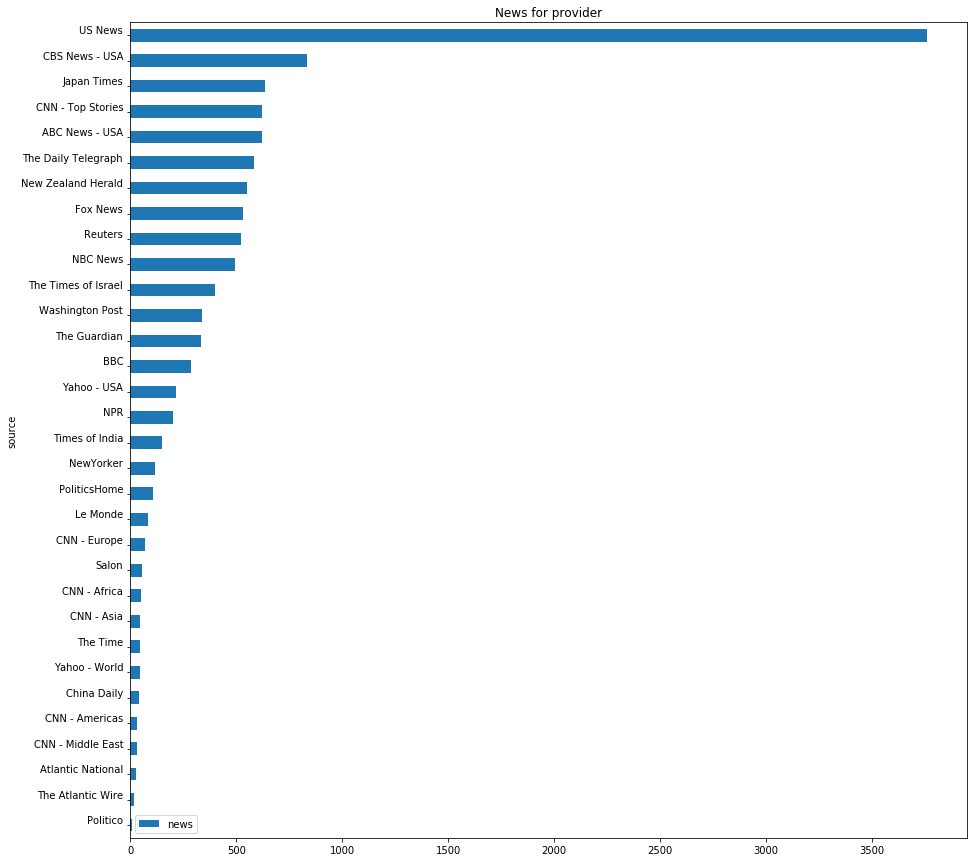

In [7]:
feedsDistribution.plot.barh("source", figsize=(15, 15), title="News for provider").invert_yaxis()

In [8]:
feedsDate = pd.read_sql_query('SELECT publication_date AS date, \
COUNT(DISTINCT id) AS news_per_day \
FROM ztis \
GROUP BY publication_date', engine)
print(feedsDate["news_per_day"].sum())
print(feedsDate.shape)

11881
(11172, 2)


In [9]:
def pars_date_with_def(x):
    if(x == "default"):
        return "default"
    else:
        return dateutil.parser.parse(x).date()

In [10]:
feedsDate['date'] = [pars_date_with_def(x) for x in feedsDate['date']]

C:\programs\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [11]:
groupedFeedDate = feedsDate.groupby('date').sum()
print(groupedFeedDate["news_per_day"].sum())
groupedFeedDate.shape

11881


(164, 1)

In [12]:
limitedFeedsDate = groupedFeedDate.drop(groupedFeedDate[groupedFeedDate['news_per_day'] < 30].index)
limitedFeedsDate

,news_per_day
date,
2019-05-08,36
2019-05-09,79
2019-05-10,121
2019-05-11,127
2019-05-12,214
2019-05-13,303
2019-05-14,1055
2019-05-15,1461
2019-05-16,1103


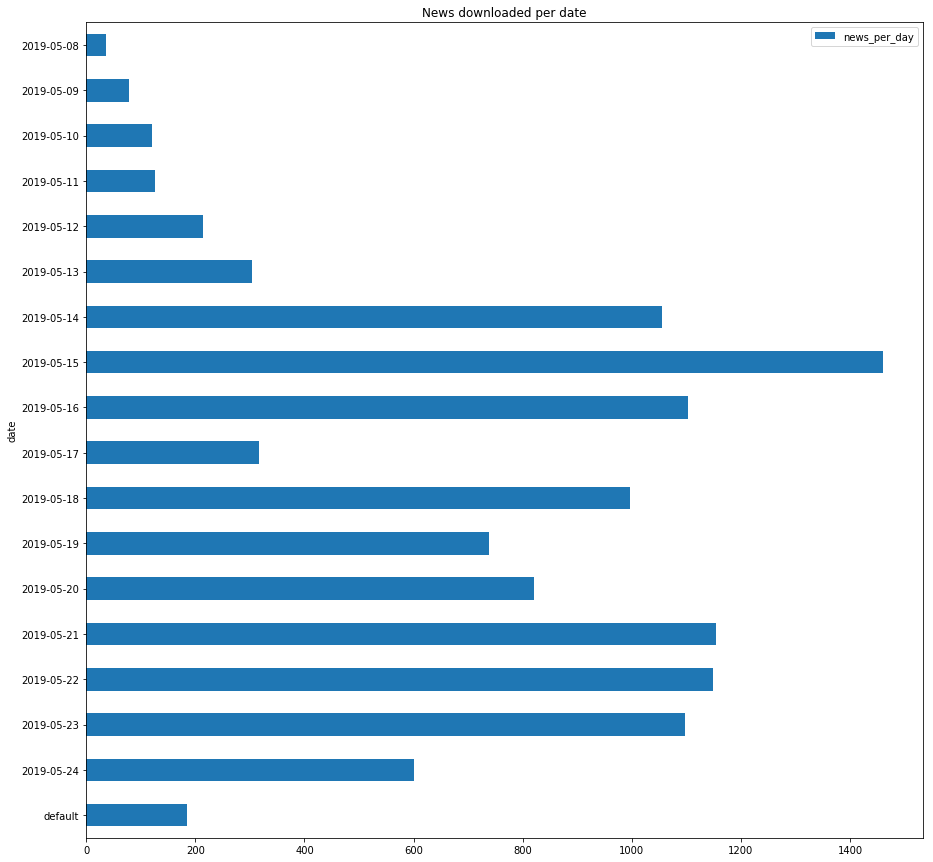

In [13]:
limitedFeedsDate.plot.barh( figsize=(15, 15), title="News downloaded per date").invert_yaxis()